In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cv2
%matplotlib inline

In [65]:
data_path = '/home/stepan/Documents/Data'

In [66]:
target_dir = 'alph_united/'
base_mnist = 'mnist_alph/'
train_data_name = 'sign_mnist_train.csv'
test_data_name = 'sign_mnist_test.csv'

In [67]:
train_data = pd.read_csv(data_path + base_mnist + train_data_name)
test_data = pd.read_csv(data_path + base_mnist + test_data_name)

FileNotFoundError: [Errno 2] File b'/home/stepan/Documents/Datamnist_alph/sign_mnist_train.csv' does not exist: b'/home/stepan/Documents/Datamnist_alph/sign_mnist_train.csv'

In [5]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
class_names = np.array([chr(ord('A') + i) for i in range(26)])
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [7]:
train_labels = train_data['label'].values
test_labels = test_data['label'].values
train_data.drop(['label'], axis=1, inplace=True)
test_data.drop(['label'], axis=1, inplace=True)

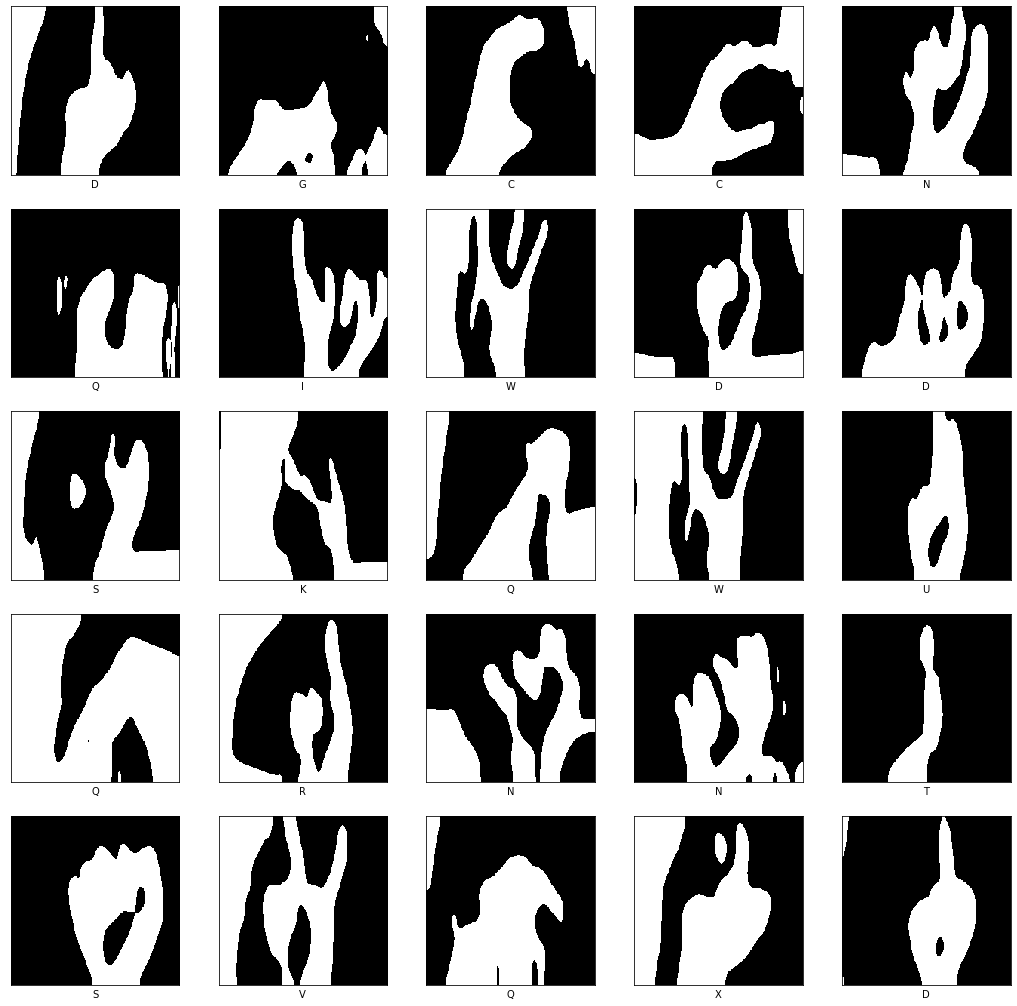

In [73]:
plt.figure(figsize=(18,18))
train_image_data = train_data.values
test_image_data = test_data.values
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    img = train_image_data[i].reshape(28, 28)
    img = cv2.resize(img.astype('float32'), (224, 224), interpolation=cv2.INTER_CUBIC)
    img = cv2.GaussianBlur(img, (5, 75), 15)
    #img = cv2.medianBlur(img.astype('float32'), 55)
    img = cv2.threshold(img.astype('uint8'), 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    plt.imshow(img[1], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [85]:
base_id = 87000
for i in range(len(train_image_data)):
    img = train_image_data[i].reshape(28, 28)
    img = cv2.resize(img.astype('float32'), (224, 224), interpolation=cv2.INTER_CUBIC)
    img = cv2.GaussianBlur(img, (5, 75), 15)
    #img = cv2.medianBlur(img.astype('float32'), 55)
    img = cv2.threshold(img.astype('uint8'), 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if not os.path.exists(data_path + target_dir + class_names[train_labels[i]] + '/'):
        os.mkdir(data_path + target_dir + class_names[train_labels[i]] + '/')
    cv2.imwrite(data_path + target_dir + class_names[train_labels[i]] + '/' + class_names[train_labels[i]] + str(base_id + i + 1) + '.jpg', ~img[1])

In [ ]:
# # Test needed????
# base_id += len(train_image_data)
# for i in range(len(train_image_data)):
#     img = train_image_data[i].reshape(28, 28)
#     img = cv2.resize(img.astype('float32'), (224, 224), interpolation=cv2.INTER_CUBIC)
#     img = cv2.GaussianBlur(img, (5, 75), 15)
#     #img = cv2.medianBlur(img.astype('float32'), 55)
#     img = cv2.threshold(img.astype('uint8'), 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     if not os.path.exists(data_path + target_dir + class_names[train_labels[i]] + '/'):
#         os.mkdir(data_path + target_dir + class_names[train_labels[i]] + '/')
#     cv2.imwrite(data_path + target_dir + class_names[train_labels[i]] + '/' + class_names[train_labels[i]] + str(base_id + i + 1) + '.jpg', ~img[1])

In [68]:
data_path = '/home/stepan/Documents/Data/alphabet/'
train_data_path = 'asl_alphabet_train/'
test_data_path = 'asl_alphabet_test/'

In [69]:
test_images_names = os.listdir(data_path + test_data_path)

In [70]:
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_adaptive_thresh(img):
    gray = get_gray(img)
    threshold_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
    return threshold_image

def get_thresh(img):
    gray = get_gray(img)
    gray = cv2.GaussianBlur(gray, (5, 27), 5)
    ret, threshold_image1 = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
    ret, threshold_image2 = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)
    return cv2.bitwise_and(threshold_image1, threshold_image2)

def draw_images(get_img, images_names, num=5, cmap=plt.cm.binary):
    for img_name in images_names[:num]:
        image = cv2.imread(data_path + test_data_path + img_name)
        plt.figure(figsize=(3,3))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = get_img(image)
        plt.imshow(img, cmap=cmap)
        plt.xlabel(img_name[:-(len(img_name) - 1)])

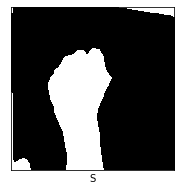

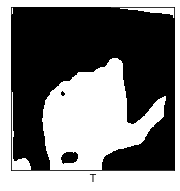

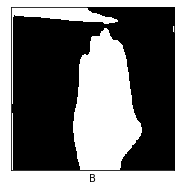

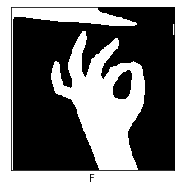

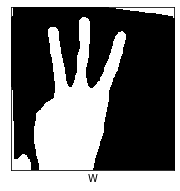

In [71]:
draw_images(get_thresh, test_images_names)

In [74]:
base_path = data_path + train_data_path
dirs_with_train = os.listdir(base_path)
result_path = '/home/stepan/Documents/Data/' + target_dir

dirs_with_train

['nothing',
 'A',
 'H',
 'F',
 'B',
 'P',
 'Y',
 'X',
 'O',
 'J',
 'del',
 'K',
 'Q',
 'S',
 'R',
 'E',
 'W',
 'G',
 'U',
 'D',
 'C',
 'N',
 'M',
 'I',
 'T',
 'space',
 'Z',
 'L',
 'V']

In [75]:
for label in dirs_with_train[27:]:
    print(" -" + label)
    nimgs = os.listdir(base_path + label)
        
    for nimg in nimgs:
        image = cv2.imread(base_path + label + '/' + nimg)
        resized = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
        processed = get_thresh(resized)
        
        if not os.path.exists(result_path + label + '/'):
            os.mkdir(result_path + label + '/')
            
        cv2.imwrite(result_path + label + '/' + nimg, ~processed)

 -L
 -V
